In [1]:
# Install TensorFlow if not already installed
!pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 197.1 kB/s eta 0:00:001m168.6 kB/s eta 0:00:01
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 2.9 MB/s eta 0:00:00
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 2.7 MB/s eta 0:00:00m eta 0:00:010:00:04
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 4.2 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 4.0 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.3 MB/s eta 0

In [3]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)
  Using cached matplotlib-3.10.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pil

In [5]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached scipy-1.15.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.3 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input

In [44]:
# Load dataset
df = pd.read_csv("../backend/brca.csv")


# Convert diagnosis
df['y'] = df['y'].map({'M': 1, 'B': 0})

df = df.drop(columns=["Unnamed: 0"])
df

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,1
565,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,1
566,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,1
567,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,1


In [45]:
# Define features and target variable
X = df.drop(columns=['y'])  # Features
y = df['y']  # Target

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Build Neural Network Model
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  
    Dense(21, activation='relu'),
    Dense(21, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  
])

In [23]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
#history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test), verbose=1)

# Define Early Stopping to stop training if val_loss doesn't improve for 5 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model with Early Stopping
history = model.fit(X_train_scaled, y_train, 
                    epochs=50, batch_size=16, 
                    validation_data=(X_test_scaled, y_test), 
                    callbacks=[early_stopping],  # Apply Early Stopping
                    verbose=1)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6379 - loss: 0.7211 - val_accuracy: 0.8509 - val_loss: 0.4570
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8648 - loss: 0.4164 - val_accuracy: 0.9211 - val_loss: 0.2953
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9077 - loss: 0.3054 - val_accuracy: 0.9298 - val_loss: 0.2319
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9411 - loss: 0.2168 - val_accuracy: 0.9298 - val_loss: 0.1966
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9567 - loss: 0.1656 - val_accuracy: 0.9298 - val_loss: 0.1744
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9704 - loss: 0.1211 - val_accuracy: 0.9386 - val_loss: 0.1599
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9775 - loss: 0.0952 - val_accuracy: 0.9474 - val_loss: 0.1522
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9731 - loss: 0.1089 - val_accuracy: 0.9474 - val_loss:

In [24]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Neural Network Accuracy: {accuracy:.4f}")
print(f"Neural Network Loss: {loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9759 - loss: 0.1277 
Neural Network Accuracy: 0.9737
Neural Network Loss: 0.1306


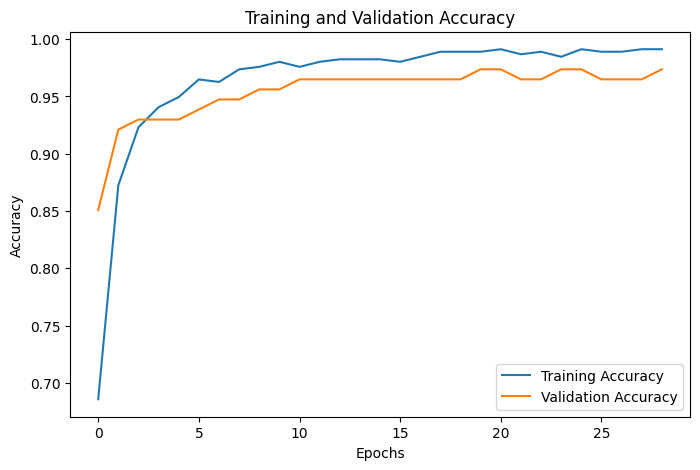

In [25]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

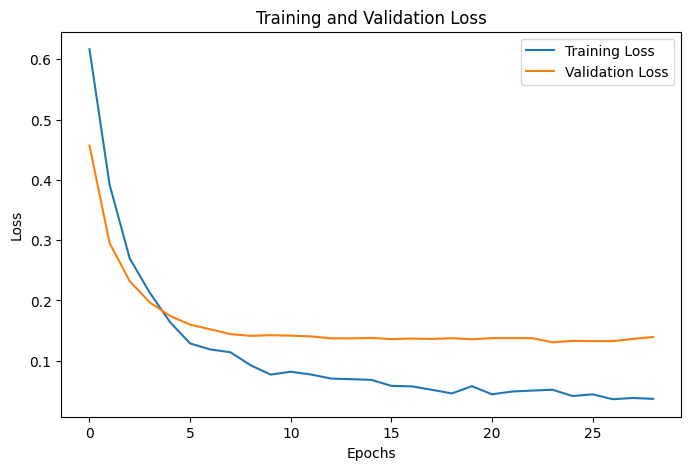

In [26]:
# Plot Training and Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

In [39]:
# Ablation experiment 1: Omit normalization of data
no_norm_model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(21, activation='relu'),
    Dense(21, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  
])


In [40]:
# Compile the model
no_norm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define Early Stopping to stop training if val_loss doesn't improve for 5 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model with Early Stopping
no_norm_history = no_norm_model.fit(X_train, y_train, 
                    epochs=50, batch_size=16, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping],  # Apply Early Stopping
                    verbose=1)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3684 - loss: 35.1879 - val_accuracy: 0.4737 - val_loss: 4.7226
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5362 - loss: 10.5587 - val_accuracy: 0.8860 - val_loss: 0.4765
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6566 - loss: 4.2083 - val_accuracy: 0.8684 - val_loss: 0.4598
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7184 - loss: 2.1325 - val_accuracy: 0.9211 - val_loss: 0.6338
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7530 - loss: 1.6809 - val_accuracy: 0.9211 - val_loss: 0.5010
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8093 - loss: 1.2112 - val_accuracy: 0.9211 - val_loss: 0.4213
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8425 - loss: 0.7844 - val_accuracy: 0.8070 - val_loss: 0.5634
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7347 - loss: 1.0008 - val_accuracy: 0.8772 - val_los

In [41]:
# Evaluate the model
loss, accuracy = no_norm_model.evaluate(X_test, y_test)
print(f"Neural Network Accuracy: {accuracy:.4f}")
print(f"Neural Network Loss: {loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9502 - loss: 0.1893 
Neural Network Accuracy: 0.9561
Neural Network Loss: 0.1822


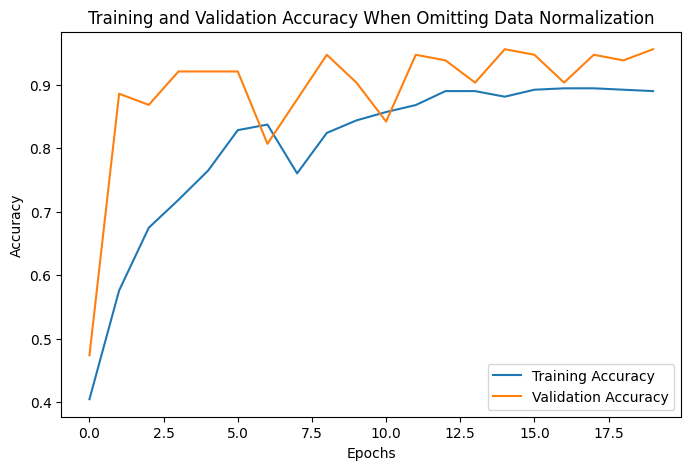

In [42]:
# Plot Training and Validation Accuracy for ablation experiment 1
plt.figure(figsize=(8, 5))
plt.plot(no_norm_history.history['accuracy'], label='Training Accuracy')
plt.plot(no_norm_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy When Omitting Data Normalization")
plt.show()

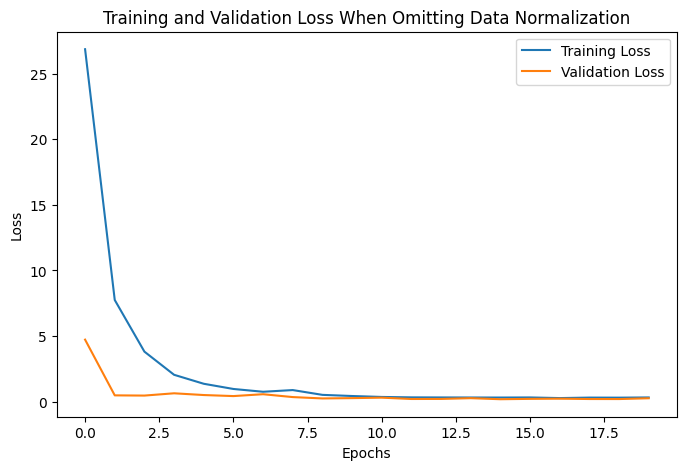

In [43]:
# Plot Training and Validation Loss for ablation experiment 1
plt.figure(figsize=(8, 5))
plt.plot(no_norm_history.history['loss'], label='Training Loss')
plt.plot(no_norm_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss When Omitting Data Normalization")
plt.show()

In [22]:
# ablation experiment 2: Omit 2nd hidden layer
no_2nd_hidden_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  
])

In [23]:
# Compile the model
no_2nd_hidden_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define Early Stopping to stop training if val_loss doesn't improve for 5 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model with Early Stopping
no_2nd_hidden_history = no_2nd_hidden_model.fit(X_train_scaled, y_train, 
                    epochs=50, batch_size=16, 
                    validation_data=(X_test_scaled, y_test), 
                    callbacks=[early_stopping],  # Apply Early Stopping
                    verbose=1)



# Evaluate the model
loss, accuracy = no_2nd_hidden_model.evaluate(X_test_scaled, y_test)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6493 - loss: 0.7335 - val_accuracy: 0.7807 - val_loss: 0.4276
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7782 - loss: 0.4304 - val_accuracy: 0.9298 - val_loss: 0.2873
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9108 - loss: 0.2970 - val_accuracy: 0.9386 - val_loss: 0.2151
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9338 - loss: 0.2116 - val_accuracy: 0.9474 - val_loss: 0.1760
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9527 - loss: 0.1853 - val_accuracy: 0.9561 - val_loss: 0.1489
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9437 - loss: 0.1534 - val_accuracy: 0.9737 - val_loss: 0.1320
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9630 - loss: 0.1399 - val_accuracy: 0.9737 - val_loss: 0.1197
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9723 - loss: 0.1104 - val_accuracy: 0.9737 - val_loss:

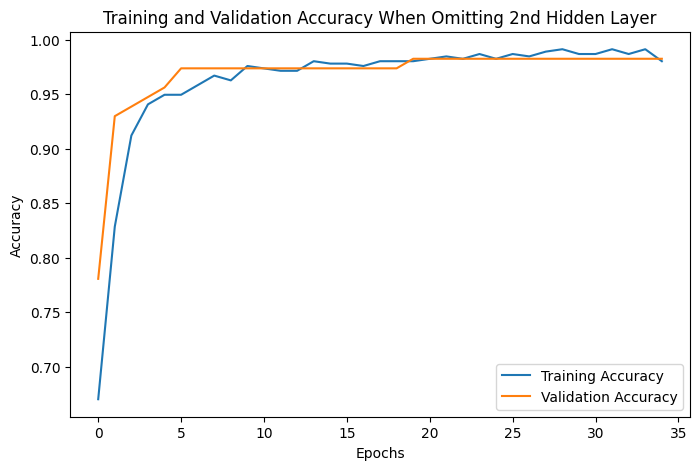

In [24]:
# Plot Training and Validation Accuracy for ablation experiment 1
plt.figure(figsize=(8, 5))
plt.plot(no_2nd_hidden_history.history['accuracy'], label='Training Accuracy')
plt.plot(no_2nd_hidden_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy When Omitting 2nd Hidden Layer")
plt.show()

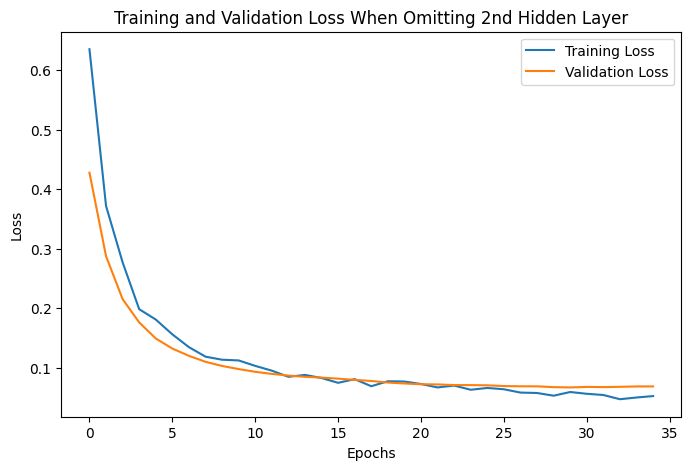

In [25]:
# Plot Training and Validation Loss for ablation experiment 1
plt.figure(figsize=(8, 5))
plt.plot(no_2nd_hidden_history.history['loss'], label='Training Loss')
plt.plot(no_2nd_hidden_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss When Omitting 2nd Hidden Layer")
plt.show()

In [47]:
no_dropout_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  
    Dense(21, activation='relu'),
    Dense(21, activation='relu'),
    Dense(1, activation='sigmoid')  
])

In [48]:
# Compile the model
no_dropout_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define Early Stopping to stop training if val_loss doesn't improve for 5 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model with Early Stopping
no_dropout_history = no_dropout_model.fit(X_train_scaled, y_train, 
                    epochs=50, batch_size=16, 
                    validation_data=(X_test_scaled, y_test), 
                    callbacks=[early_stopping],  # Apply Early Stopping
                    verbose=1)



# Evaluate the model
loss, accuracy = no_dropout_model.evaluate(X_test_scaled, y_test)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7385 - loss: 0.5717 - val_accuracy: 0.8421 - val_loss: 0.3897
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8872 - loss: 0.3609 - val_accuracy: 0.9211 - val_loss: 0.2529
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9357 - loss: 0.2252 - val_accuracy: 0.9298 - val_loss: 0.1894
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9492 - loss: 0.1684 - val_accuracy: 0.9211 - val_loss: 0.1579
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9689 - loss: 0.1292 - val_accuracy: 0.9123 - val_loss: 0.1384
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9681 - loss: 0.0986 - val_accuracy: 0.9298 - val_loss: 0.1271
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9823 - loss: 0.0814 - val_accuracy: 0.9386 - val_loss: 0.1184
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9836 - loss: 0.0924 - val_accuracy: 0.9386 - val_loss:

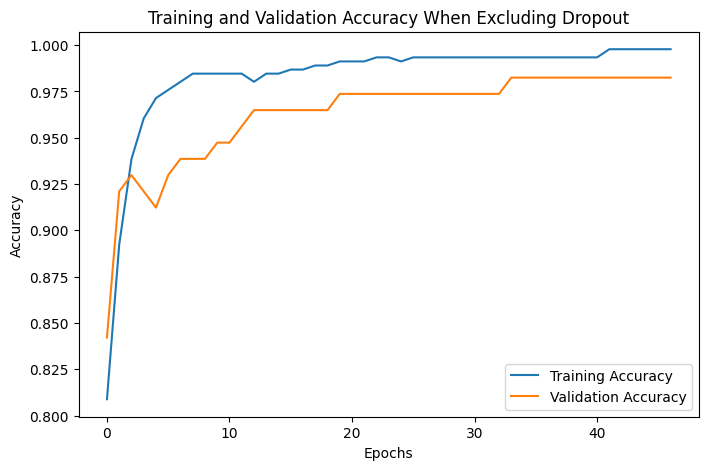

In [49]:
# Plot Training and Validation Accuracy for ablation experiment 3
plt.figure(figsize=(8, 5))
plt.plot(no_dropout_history.history['accuracy'], label='Training Accuracy')
plt.plot(no_dropout_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy When Excluding Dropout")
plt.show()

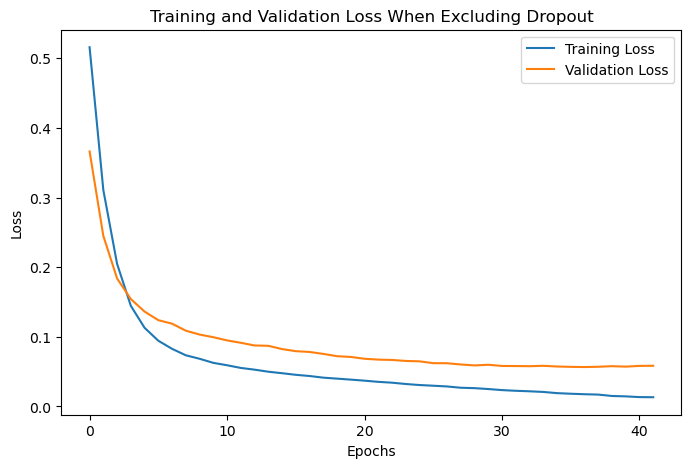

In [44]:
# Plot Training and Validation Loss for ablation experiment 3
plt.figure(figsize=(8, 5))
plt.plot(no_dropout_history.history['loss'], label='Training Loss')
plt.plot(no_dropout_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss When Excluding Dropout")
plt.show()

In [30]:
no_1st_hidden_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  
])

In [31]:
# Compile the model
no_1st_hidden_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define Early Stopping to stop training if val_loss doesn't improve for 5 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train the model with Early Stopping
no_1st_history = no_1st_hidden_model.fit(X_train_scaled, y_train, 
                    epochs=50, batch_size=16, 
                    validation_data=(X_test_scaled, y_test), 
                    callbacks=[early_stopping],  # Apply Early Stopping
                    verbose=1)



# Evaluate the model
loss, accuracy = no_1st_hidden_model.evaluate(X_test_scaled, y_test)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8722 - loss: 0.4442 - val_accuracy: 0.9298 - val_loss: 0.2904
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9226 - loss: 0.2685 - val_accuracy: 0.9298 - val_loss: 0.2120
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9510 - loss: 0.2020 - val_accuracy: 0.9474 - val_loss: 0.1713
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9521 - loss: 0.1594 - val_accuracy: 0.9561 - val_loss: 0.1452
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9638 - loss: 0.1478 - val_accuracy: 0.9561 - val_loss: 0.1283
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9764 - loss: 0.1070 - val_accuracy: 0.9561 - val_loss: 0.1163
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9684 - loss: 0.1293 - val_accuracy: 0.9561 - val_loss: 0.1076
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9772 - loss: 0.1050 - val_accuracy: 0.9561 - val_loss:

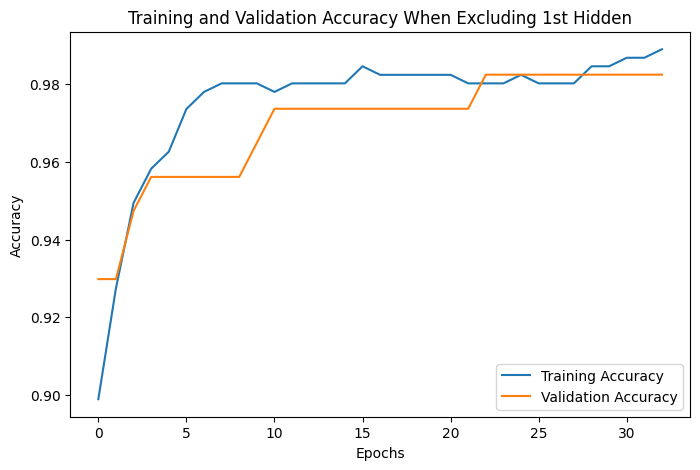

In [32]:
# Plot Training and Validation Accuracy for ablation experiment 3
plt.figure(figsize=(8, 5))
plt.plot(no_1st_history.history['accuracy'], label='Training Accuracy')
plt.plot(no_1st_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy When Excluding 1st Hidden")
plt.show()

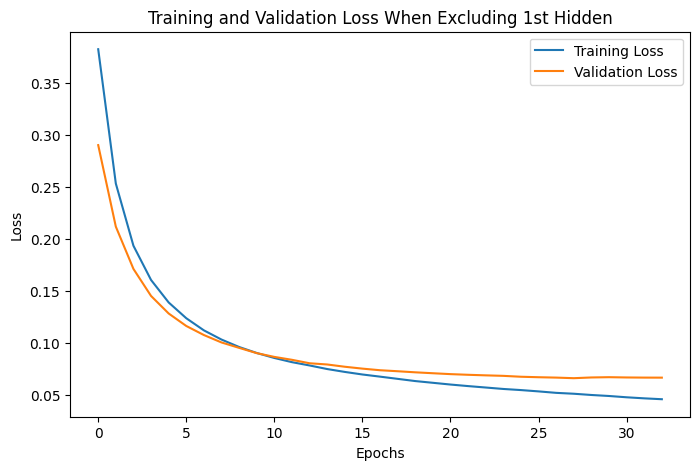

In [33]:
# Plot Training and Validation Loss for ablation experiment 3
plt.figure(figsize=(8, 5))
plt.plot(no_1st_history.history['loss'], label='Training Loss')
plt.plot(no_1st_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss When Excluding 1st Hidden")
plt.show()

In [143]:
no_early_stop_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  
    Dense(21, activation='relu'),
    Dense(21, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  
])

In [144]:
# Compile the model
no_early_stop_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
no_early_stop_history = no_early_stop_model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test), verbose=1)

# Evaluate the model
loss, accuracy = no_early_stop_model.evaluate(X_test_scaled, y_test)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6815 - loss: 0.5977 - val_accuracy: 0.8596 - val_loss: 0.3909
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8752 - loss: 0.3489 - val_accuracy: 0.9298 - val_loss: 0.2437
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9167 - loss: 0.2431 - val_accuracy: 0.9474 - val_loss: 0.1711
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9663 - loss: 0.1591 - val_accuracy: 0.9474 - val_loss: 0.1343
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9734 - loss: 0.1234 - val_accuracy: 0.9649 - val_loss: 0.1130
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9564 - loss: 0.1214 - val_accuracy: 0.9649 - val_loss: 0.1014
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9587 - loss: 0.1338 - val_accuracy: 0.9649 - val_loss: 0.0930
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9773 - loss: 0.0895 - val_accuracy: 0.9649 - val_loss

In [152]:
# Evaluate the model
loss, accuracy = no_early_stop_model.evaluate(X_test_scaled, y_test)
print(f"Neural Network Accuracy When Excluding Early Stopping: {accuracy:.4f}")
print(f"Loss When Excluding Early Stopping: {loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9703 - loss: 0.1411 
Neural Network Accuracy When Excluding Early Stopping: 0.9649
Loss When Excluding Early Stopping: 0.1091


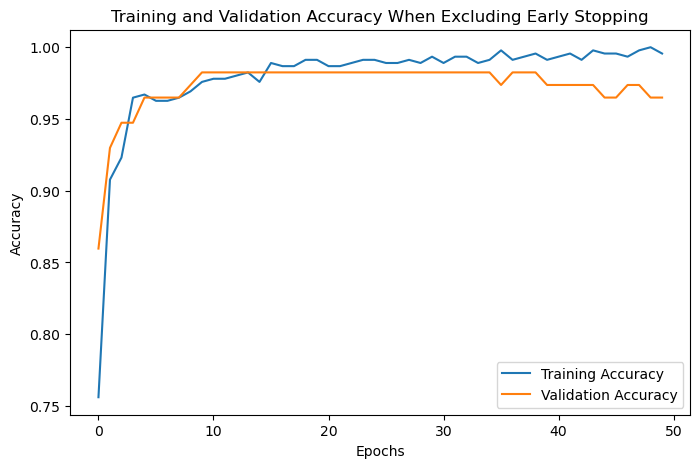

In [146]:
# Plot Training and Validation Accuracy for ablation experiment 3
plt.figure(figsize=(8, 5))
plt.plot(no_early_stop_history.history['accuracy'], label='Training Accuracy')
plt.plot(no_early_stop_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy When Excluding Early Stopping")
plt.show()

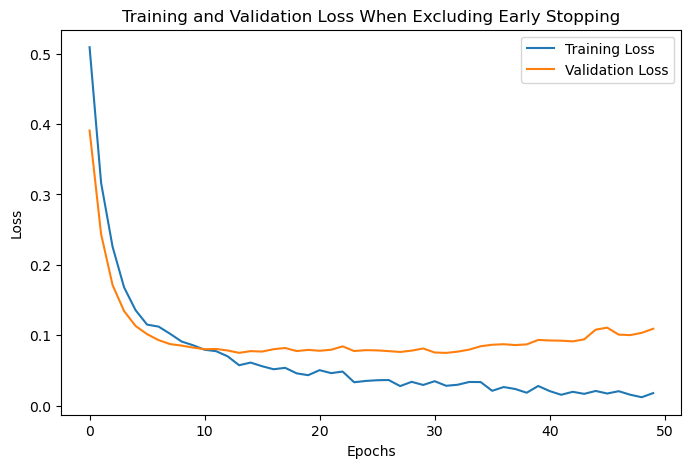

In [147]:
# Plot Training and Validation Loss for ablation experiment 3
plt.figure(figsize=(8, 5))
plt.plot(no_early_stop_history.history['loss'], label='Training Loss')
plt.plot(no_early_stop_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss When Excluding Early Stopping")
plt.show()

In [34]:
no_hiddens_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  
    Dense(1, activation='sigmoid')  
])

In [35]:
# Compile the model
no_hiddens_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Define Early Stopping to stop training if val_loss doesn't improve for 5 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
# Train the model
no_hiddens_history = no_hiddens_model.fit(X_train_scaled, y_train, epochs=50, 
                                          batch_size=16, validation_data=(X_test_scaled, y_test), verbose=1, callbacks=[early_stopping])

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4055 - loss: 0.9562 - val_accuracy: 0.5614 - val_loss: 0.7219
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5534 - loss: 0.7115 - val_accuracy: 0.6842 - val_loss: 0.5938
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6638 - loss: 0.6106 - val_accuracy: 0.7544 - val_loss: 0.5026
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7298 - loss: 0.5254 - val_accuracy: 0.8070 - val_loss: 0.4372
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7890 - loss: 0.4504 - val_accuracy: 0.8158 - val_loss: 0.3870
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8288 - loss: 0.4139 - val_accuracy: 0.8509 - val_loss: 0.3484
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8577 - loss: 0.3535 - val_accuracy: 0.8596 - val_loss: 0.3175
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8741 - loss: 0.3195 - val_accuracy: 0.8772 - val_loss:

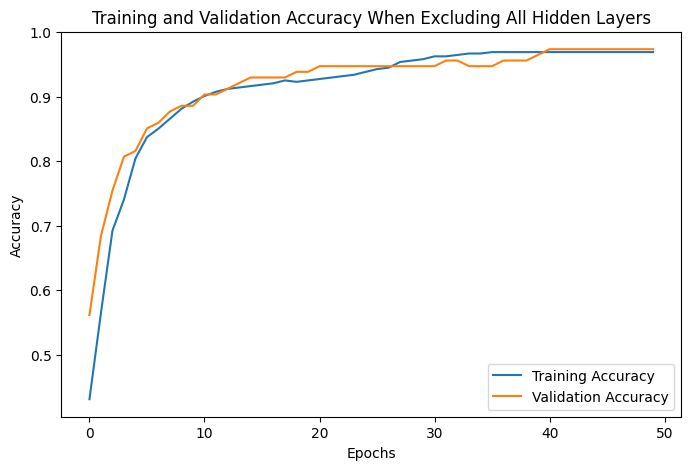

In [36]:
# Plot Training and Validation Accuracy for ablation experiment 4
plt.figure(figsize=(8, 5))
plt.plot(no_hiddens_history.history['accuracy'], label='Training Accuracy')
plt.plot(no_hiddens_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy When Excluding All Hidden Layers")
plt.show()

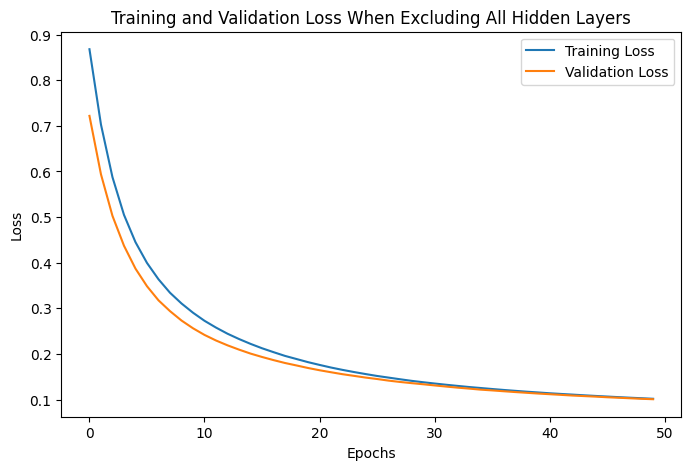

In [37]:
# Plot Training and Validation Loss for ablation experiment 4
plt.figure(figsize=(8, 5))
plt.plot(no_hiddens_history.history['loss'], label='Training Loss')
plt.plot(no_hiddens_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss When Excluding All Hidden Layers")
plt.show()

In [38]:
loss, accuracy = no_hiddens_model.evaluate(X_test_scaled, y_test)

print(f"Neural Network Accuracy When Excluding All Hidden: {accuracy:.4f}")
print(f"Loss When Excluding All Hidden: {loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9728 - loss: 0.1173 
Neural Network Accuracy When Excluding All Hidden: 0.9737
Loss When Excluding All Hidden: 0.1006
